In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('../dataset/strokeDataSet.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Generate Syntetics

In [7]:
np.random.seed(42)


# Calculate stroke class distribution
stroke_ratio = df['stroke'].value_counts(normalize=True)


# Function to sample categorical data based on original proportions
def generate_categorical(column, size):
    probs = df[column].value_counts(normalize=True)
    return np.random.choice(probs.index, size=size, p=probs.values)

# Function to sample numerical data with replacement from real values
def generate_numerical(column, size):
    return np.random.choice(df[column].dropna(), size=size, replace=True)

# Total synthetic rows
num_samples = 200000

# Create synthetic dataset
synthetic_data = pd.DataFrame({
    'id': np.arange(1, num_samples + 1),
    'gender': generate_categorical('gender', num_samples),
    'age': generate_numerical('age', num_samples),
    'hypertension': generate_categorical('hypertension', num_samples),
    'heart_disease': generate_categorical('heart_disease', num_samples),
    'ever_married': generate_categorical('ever_married', num_samples),
    'work_type': generate_categorical('work_type', num_samples),
    'Residence_type': generate_categorical('Residence_type', num_samples),
    'avg_glucose_level': generate_numerical('avg_glucose_level', num_samples),
    'bmi': generate_numerical('bmi', num_samples),
    'smoking_status': generate_categorical('smoking_status', num_samples),
    'stroke': np.random.choice(stroke_ratio.index, size=num_samples, p=stroke_ratio.values)
})



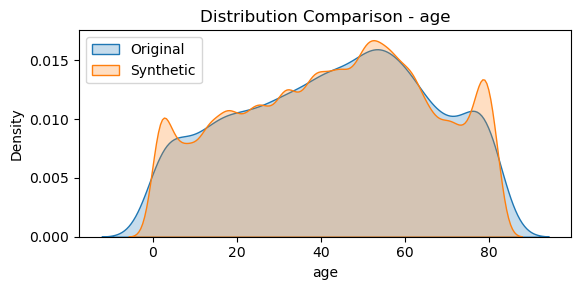

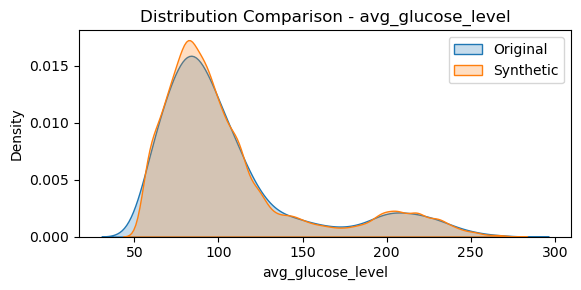

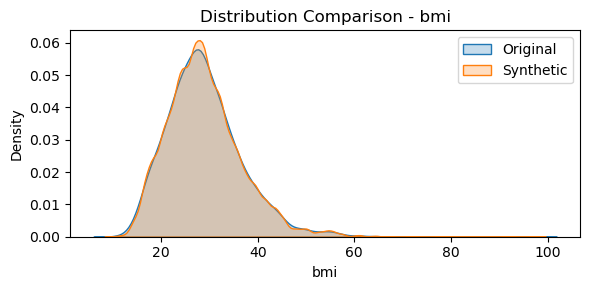

Kolmogorov–Smirnov Test Results:
age: KS=0.002, p-value=1.000
avg_glucose_level: KS=0.002, p-value=1.000
bmi: KS=0.002, p-value=1.000

Jensen-Shannon Divergence (Categoricals):
gender: JS Divergence = 0.0000
ever_married: JS Divergence = 0.0000
work_type: JS Divergence = 0.0000
Residence_type: JS Divergence = 0.0000
smoking_status: JS Divergence = 0.0000

Classifier AUC Score (real vs synthetic): 0.7804


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, entropy
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load both datasets
df_real = df
df_synth = synthetic_data

# Drop ID column
df_real = df_real.drop(columns=["id"])
df_synth = df_synth.drop(columns=["id"])

# Function to visualize distributions
def plot_distributions(columns):
    for col in columns:
        plt.figure(figsize=(6, 3))
        sns.kdeplot(df_real[col].dropna(), label='Original', fill=True)
        sns.kdeplot(df_synth[col].dropna(), label='Synthetic', fill=True)
        plt.title(f"Distribution Comparison - {col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Visualize numerical columns
plot_distributions(["age", "avg_glucose_level", "bmi"])

# KS Test for numeric similarity
print("Kolmogorov–Smirnov Test Results:")
for col in ["age", "avg_glucose_level", "bmi"]:
    ks_stat, p_val = ks_2samp(df_real[col].dropna(), df_synth[col].dropna())
    print(f"{col}: KS={ks_stat:.3f}, p-value={p_val:.3f}")

# JS Divergence for categorical distributions
def jensen_shannon(p, q):
    p = np.array(p)
    q = np.array(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

print("\nJensen-Shannon Divergence (Categoricals):")
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
for col in cat_cols:
    p = df_real[col].value_counts(normalize=True)
    q = df_synth[col].value_counts(normalize=True).reindex(p.index, fill_value=0)
    js = jensen_shannon(p, q)
    print(f"{col}: JS Divergence = {js:.4f}")

# Classifier Two-Sample Test
df_real["source"] = 0
df_synth["source"] = 1
combined = pd.concat([df_real, df_synth], axis=0).reset_index(drop=True)

# Encode categoricals
for col in combined.select_dtypes("object").columns:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col].astype(str))

X = combined.drop(columns=["source"])
y = combined["source"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred)
print(f"\nClassifier AUC Score (real vs synthetic): {auc:.4f}")


In [4]:
import sys
print(sys.executable)

C:\Users\praka\anaconda3\envs\aai501\python.exe


In [5]:
import sdv

print(dir(sdv))

['ModuleType', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_find_addons', '_get_addon_target', '_utils', 'attrgetter', 'cag', 'constraints', 'data_processing', 'datasets', 'entry_points', 'errors', 'evaluation', 'io', 'lite', 'logging', 'metadata', 'metrics', 'multi_table', 'sampling', 'sequential', 'single_table', 'sys', 'utils', 'version', 'warnings']


In [ ]:
import pandas as pd 
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sklearn.utils import resample
from ipyparallel import Client


df = pd.read_csv('../dataset/strokeDataSet.csv')

df = df.drop(columns=['id'])
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

df_majority = df[df.stroke == 0]
df_minority = df[df.stroke == 1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_balanced)

def train_ctgan(epochs, metadata, df_balanced):  
    from sdv.single_table import CTGANSynthesizer
    synthesizer = CTGANSynthesizer(metadata=metadata, epochs=epochs, verbose=True)
    synthesizer.fit(df_balanced)
    synthesizer.save(f'ctgan_{epochs}.pkl')
    return epochs


rc = Client()
lview = rc.load_balanced_view()

futures = [lview.apply_async(train_ctgan, epochs, metadata, df_balanced) for epochs in [400, 500, 600]]


results = [f.result() for f in futures]

print("Trained models for epochs:", results)





In [1]:
import pandas as pd 
import numpy as np
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import Metadata
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

print("Starting...")
df = pd.read_csv('../dataset/strokeDataSet.csv')

df = df.drop(columns=['id'])
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

df_majority = df[df.stroke == 0]
df_minority = df[df.stroke == 1]

print("starting resample...")
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("Resample complete....")


print("Metadata start")

metadata = Metadata()
metadata.detect_from_dataframe(data=df_balanced)
metadata.save_to_json(filepath='strokeMetadata.json')
print("Metadata complete")


print("Synthesizer start")
epochs = 600
synthesizer = CTGANSynthesizer(metadata=metadata, epochs=epochs, verbose=True)
synthesizer.fit(df_balanced)
synthesizer.save(f'ctgan_{epochs}.pkl')

print("Synthesizer complete")


print("sampling start")
synthetic_data = synthesizer.sample(num_rows=1_000_000)
synthetic_data.to_csv(f'syntheticData{epochs}.csv', index=False)
print("sampling end")


diagnostic = run_diagnostic(df, synthetic_data, metadata)
quality_report = evaluate_quality(df, synthetic_data, metadata)

display(diagnostic)
display(quality_report)

print("Executing auc score")


df['source'] =0 
synthetic_data['source']=1

combined = pd.concat([df, synthetic_data], axis=0).reset_index(drop=True)

for c in combined.select_dtypes('object').columns:
        le = LabelEncoder()
        combined[c] = le.fit_transform(combined[c].astype(str))

X = combined.drop(columns=["source"])
y = combined["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

Starting...
starting resample...
Resample complete....
Metadata start
Metadata complete
Synthesizer start


C:\Users\praka\anaconda3\envs\aai501\lib\site-packages\sdv\single_table\base.py:163: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\praka\anaconda3\envs\aai501\lib\site-packages\sdv\single_table\base.py:129: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.75) | Discrim. (-0.28): 100%|████████████████████████████████████████████████████████████| 500/500 [15:52<00:00,  1.91s/it]


NameError: name 'epochs' is not defined

In [4]:
synthetic_data = synthesizer.sample(num_rows=1_000_000)

In [7]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot


diagnostic = run_diagnostic(df, synthetic_data, metadata)
quality_report = evaluate_quality(df, synthetic_data, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 27.79it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 329.38it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  5.80it/s]|
Column Shapes Score: 88.17%

(2/2) Evaluating Column Pair Trends: |█████████████████████████████████████████████████████████████| 55/55 [00:04<00:00, 12.50it/s]|
Column Pair Trends Score: 77.72%

Overall Score (Average): 82.94%



In [16]:
quality_report.get_score()

np.float64(0.8294204532232865)

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


df['source'] =0 
synthetic_data['source']=1

combined = pd.concat([df, synthetic_data], axis=0).reset_index(drop=True)

for c in combined.select_dtypes('object').columns:
        le = LabelEncoder()
        combined[c] = le.fit_transform(combined[c].astype(str))

X = combined.drop(columns=["source"])
y = combined["source"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_0estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)


In [29]:
print(f"{auc:.4f}")

0.9192
